In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt

In [44]:
df=pd.read_csv("WineQT.csv")[:100]

df.drop(["Id","quality"],axis=1,inplace=True)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [45]:
normalizer = Normalizer()

df_np = normalizer.transform(df)

df_np

c:\Users\91800\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Normalizer was fitted without feature names
  warnings.warn(


array([[0.19515252, 0.01846037, 0.        , ..., 0.09256559, 0.0147683 ,
        0.24789644],
       [0.10724124, 0.01209901, 0.        , ..., 0.04399641, 0.00934924,
        0.134739  ],
       [0.13545665, 0.01319834, 0.00069465, ..., 0.05661393, 0.01128805,
        0.17018912],
       ...,
       [0.26800367, 0.0165907 , 0.00340322, ..., 0.14208448, 0.02467335,
        0.39987849],
       [0.07398774, 0.00483766, 0.        , ..., 0.05236055, 0.01124044,
        0.19919775],
       [0.05579656, 0.00461527, 0.00378865, ..., 0.02183643, 0.00427085,
        0.06475156]])

In [46]:
df_np.shape

(100, 11)

In [47]:
def e_distance(features,sample):
    return np.sqrt(np.sum((sample-features) ** 2))

In [48]:
# iterate over the dataset rows
    # compare distance of the point to all clusters
    # assign the point to closer clusters and append it to the list
# repeat till all rows are done

# calcute the final variance of the clusters

In [49]:
for j in range(1000):
    k = 3
    
    least_variance = 1000

    data = {}
    for i in range(k):
        data[i] = {}
        data[i]["center"] = df_np[np.random.randint(0, len(df_np))]
        data[i]["cluster"] = []


    converged = False
    for epoch in range(10):
        # iterate over the dataset rows
        for i in range(len(df_np)):
            distances = []
            # compare distance of the point to all cluster's centers
            for cluster in data:
                distances.append(e_distance(df_np[i], data[cluster]["center"]))
            # assign the point to closer clusters and append it to the list
            
            cluster_assignment = distances.index(min(distances))
            data[cluster_assignment]["cluster"].append(df_np[i])
            
        for key in data:
            cluster_data = data[key]
            
            # FIND THE Centeroid of the cluster
            cluster_sum = sum(cluster_data["cluster"])
            
            try:
                centeroid = cluster_sum/ len(cluster_data["cluster"])    
            except:
                centeroid = data[key]["center"]
            
            if data[key]["center"].all() == centeroid.all():
                # print("Converged")
                converged = True
                break
            
            data[key]["center"] = centeroid
            
        # variance of the clustering
        final_variance = 0
        
        # print(f"\nEpoch : {epoch+1}")
        for key in data:
            cluster_data = data[key]
            
            total_variance = 0
            for point in cluster_data["cluster"]:
                variance = ((cluster_data["center"] - point)**2).sum()
                total_variance += variance
            
            # print(f"Cluster: {key}, Variance: {total_variance}")
            
            final_variance += total_variance
            
            data[key]["cluster"] = []
        
        if converged:
            break

    if final_variance < least_variance:
        least_variance = final_variance
        
        for i in range(len(df_np)):
            distances = []
            # compare distance of the point to all cluster's centers
            for cluster in data:
                distances.append(e_distance(df_np[i], data[cluster]["center"]))
            # assign the point to closer clusters and append it to the list
            
            cluster_assignment = distances.index(min(distances))
            data[cluster_assignment]["cluster"].append(df_np[i])
    
    
print(f"k = {k}, Variation: {least_variance}")

k = 3, Variation: 3.5668887787835812


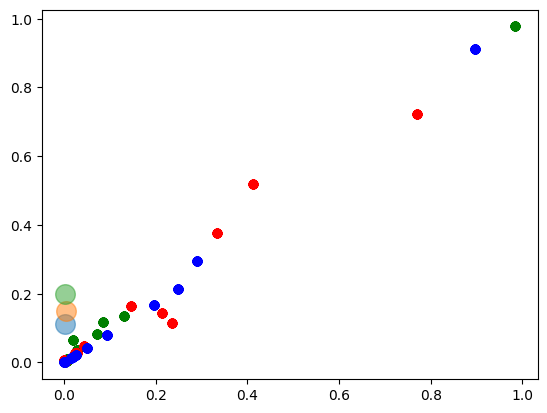

In [50]:
colors = ["green","red","blue","yellow"]
axis = [4 ,5]

for key in data:
    cluster_data = data[key]
    points = cluster_data["cluster"]
    
    x_points = []
    y_points = []
    plt.scatter(x=cluster_data["center"][axis[0]], y = cluster_data["center"][axis[1]], s=200, alpha=0.5)
    
    for point in points:
        x_points.append(points[axis[0]])
        y_points.append(points[axis[1]])

    plt.scatter(x=x_points, y = y_points, c=colors[key])
plt.show()